<a href="https://colab.research.google.com/github/beaes/dw_matrix_road_sign/blob/master/day4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
import os
import datetime

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

%load_ext tensorboard

import matplotlib.pyplot as plt
from skimage import color, exposure

from sklearn.metrics import accuracy_score

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [2]:
cd 'drive/My Drive/Colab Notebooks/dw_matrix/matrix_three/dw_matrix_road_sign'

/content/drive/My Drive/Colab Notebooks/dw_matrix/matrix_three/dw_matrix_road_sign


In [5]:
train = pd.read_pickle('data/train.p')
test = pd.read_pickle('data/test.p')

X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

y_train

array([41, 41, 41, ..., 25, 25, 25], dtype=uint8)

In [6]:
len(np.unique(y_train))

43

In [7]:
y_train.shape

(34799,)

In [8]:
X_train.shape

(34799, 32, 32, 3)

In [9]:
if y_train.ndim == 1: y_train = to_categorical(y_train)
if y_test.ndim == 1: y_test = to_categorical(y_test)

input_shape = X_train.shape[1:]
num_classes = y_train.shape[1]

model = Sequential([
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    Flatten(),
    Dense(num_classes, activation='softmax'),              
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 64)        1792      
_________________________________________________________________
flatten (Flatten)            (None, 57600)             0         
_________________________________________________________________
dense (Dense)                (None, 43)                2476843   
Total params: 2,478,635
Trainable params: 2,478,635
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.fit(X_train, y_train)

1088/1088 [==============================] - 3s 3ms/step - loss: 12.6091 - accuracy: 0.7833


# powyższy model wrzucamy do funkcji


In [12]:
def get_cnn_v1(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    Flatten(),
    Dense(num_classes, activation='softmax'), 
  ])
# powyzej czesc ktora nam zwraca model

def train_model(model, X_train, y_train, params_fit={}):
  model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

  logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

  model.fit(
      X_train,
      y_train,
      batch_size=params_fit.get('batch_size', 128),
      epochs=params_fit.get('epochs', 5),
      verbose=params_fit.get('verbose', 1),
      validation_data=params_fit.get('validation_data', (X_train, y_train)),
      callbacks= [tensorboard_callback]
  )

  return model

  # ponizej czesc ktora nam przypisuje w modelu wynik trenowania

model = get_cnn_v1(input_shape, num_classes)
model_trained = train_model(model, X_train, y_train)

Epoch 1/5
272/272 [==============================] - 3s 9ms/step - loss: 38.4005 - accuracy: 0.7440 - val_loss: 0.2275 - val_accuracy: 0.9505
Epoch 2/5
272/272 [==============================] - 2s 9ms/step - loss: 0.2056 - accuracy: 0.9513 - val_loss: 0.1201 - val_accuracy: 0.9718
Epoch 3/5
272/272 [==============================] - 2s 9ms/step - loss: 0.1520 - accuracy: 0.9631 - val_loss: 0.1303 - val_accuracy: 0.9666
Epoch 4/5
272/272 [==============================] - 2s 9ms/step - loss: 0.0987 - accuracy: 0.9756 - val_loss: 0.0595 - val_accuracy: 0.9846
Epoch 5/5
272/272 [==============================] - 2s 9ms/step - loss: 0.0736 - accuracy: 0.9825 - val_loss: 0.0698 - val_accuracy: 0.9851


In [13]:
y_pred_prob = model_trained.predict(X_test)
y_pred_prob

# zwraca nam prawdopodobienstwo na ile ten znak nalezy do tej klasy a wynik jest w postaci tablicy

array([[1.3307210e-08, 9.1855967e-05, 3.0679745e-04, ..., 9.6459838e-04,
        7.2454149e-04, 3.9923094e-02],
       [2.6080016e-09, 3.1434040e-05, 7.6906214e-04, ..., 7.0310642e-05,
        7.7989938e-07, 5.8217067e-04],
       [1.5896470e-08, 1.6649359e-05, 2.7033810e-05, ..., 4.4436462e-04,
        7.5876531e-03, 1.6061279e-01],
       ...,
       [1.0916429e-02, 8.2423398e-03, 3.5759755e-03, ..., 2.4621952e-03,
        8.9344075e-03, 9.5346933e-03],
       [3.4279816e-03, 6.5539046e-03, 1.0507299e-03, ..., 1.4818854e-03,
        5.6974641e-03, 2.1354316e-03],
       [1.0360082e-03, 2.1567056e-03, 2.0735553e-03, ..., 1.2475319e-03,
        5.5323928e-03, 3.7481962e-04]], dtype=float32)

In [14]:
y_pred_prob[400]

# teraz upraszczamy aby powyzszy wynik byl bardziej zrozumialy

array([1.17865972e-01, 8.74693155e-01, 1.22092012e-03, 1.04387459e-06,
       5.96080534e-03, 1.54993722e-06, 4.59651589e-28, 5.14413300e-17,
       3.46762509e-18, 2.55914609e-04, 1.20286090e-14, 2.54421946e-17,
       1.22102810e-24, 2.02279074e-14, 2.44417816e-16, 2.15340685e-13,
       7.58117210e-07, 3.81169108e-21, 4.98956396e-21, 5.91679144e-26,
       1.74242962e-16, 1.03502344e-19, 2.22352250e-32, 1.65102669e-17,
       1.15516641e-21, 2.24169565e-18, 1.03015038e-20, 1.44596682e-27,
       3.56612716e-20, 1.72901815e-20, 1.85232343e-25, 2.44167344e-22,
       4.67809048e-32, 3.33770447e-21, 7.53483586e-23, 2.80138063e-21,
       2.00994748e-27, 7.05439539e-28, 3.25736420e-22, 4.77221134e-18,
       2.28686520e-21, 3.60613279e-32, 1.19979741e-25], dtype=float32)

In [21]:
np.argmax(y_pred_prob[400])

# zwraca nam indeks gdzie znajduje sie maksymalna wartosc

1

In [15]:
y_pred_prob[0]

array([1.3307210e-08, 9.1855967e-05, 3.0679745e-04, 1.0687941e-03,
       3.4169502e-06, 2.6098592e-04, 1.2768545e-05, 1.1533610e-04,
       6.1980641e-04, 7.0268911e-04, 3.1679535e-06, 7.8932368e-05,
       4.0057510e-02, 7.7902149e-07, 1.1452665e-06, 3.4582768e-06,
       1.2812238e-07, 3.6193262e-07, 6.4133353e-08, 4.4996094e-11,
       4.4316899e-08, 7.6793449e-06, 3.4475476e-12, 1.6449577e-03,
       1.6346409e-07, 6.8102555e-13, 3.3751630e-07, 5.9589770e-08,
       7.8706971e-06, 8.3358576e-10, 1.6251150e-08, 1.0990926e-07,
       9.1338933e-01, 4.7671950e-08, 3.4240500e-07, 2.1319809e-06,
       1.0304396e-06, 2.7309608e-07, 3.8837720e-06, 1.4628916e-06,
       9.6459838e-04, 7.2454149e-04, 3.9923094e-02], dtype=float32)

In [25]:
np.sum([1.17865972e-01, 8.74693155e-01, 1.22092012e-03, 1.04387459e-06,
       5.96080534e-03, 1.54993722e-06, 4.59651589e-28, 5.14413300e-17,
       3.46762509e-18, 2.55914609e-04, 1.20286090e-14, 2.54421946e-17,
       1.22102810e-24, 2.02279074e-14, 2.44417816e-16, 2.15340685e-13,
       7.58117210e-07, 3.81169108e-21, 4.98956396e-21, 5.91679144e-26,
       1.74242962e-16, 1.03502344e-19, 2.22352250e-32, 1.65102669e-17,
       1.15516641e-21, 2.24169565e-18, 1.03015038e-20, 1.44596682e-27,
       3.56612716e-20, 1.72901815e-20, 1.85232343e-25, 2.44167344e-22,
       4.67809048e-32, 3.33770447e-21, 7.53483586e-23, 2.80138063e-21,
       2.00994748e-27, 7.05439539e-28, 3.25736420e-22, 4.77221134e-18,
       2.28686520e-21, 3.60613279e-32, 1.19979741e-25])
# to suma wszystkich prawdopodobienstw ze wszystkich klas i powinno byc 100 procent czyli jedynka z zaokragleniem gdzies wychodzi

1.0000001189982681

<BarContainer object of 43 artists>

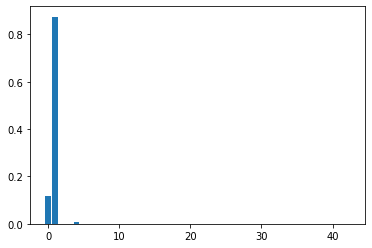

In [26]:
plt.bar(range(43), y_pred_prob[400])

In [0]:
df = pd.read_csv('data/signnames.csv')
labels_dict = df.to_dict()['b']

In [27]:
labels_dict[1]

'Speed limit (30km/h)'

In [24]:
labels_dict[np.argmax(y_pred_prob[400])]

'Speed limit (30km/h)'

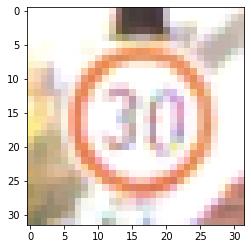

In [18]:
plt.imshow(X_test[400])

In [19]:
ls data

signnames.csv  test.p  train.p


In [28]:
def predict(model_trained, X_test, y_test, scoring=accuracy_score):
  y_test_norm = np.argmax(y_test, axis=1)

  y_pred_prob = model_trained.predict(X_test)
  y_pred = np.argmax(y_pred_prob, axis=1)

  return scoring(y_test_norm, y_pred)

predict(model_trained, X_test, y_test)

0.8208616780045351

In [29]:
def train_and_predict(model):
  model_trained = train_model(model, X_train, y_train)
  return predict(model_trained, X_test, y_test)

def get_cnn_v2(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Flatten(),

    Dense(1024, activation='relu'),
    Dropout(0.3),

    Dense(num_classes, activation='softmax'), 
  ])

train_and_predict(get_cnn_v2(input_shape, num_classes))

# powyzej jest to rodzaj architecture engineering i chcemy zeby nam sie szybciej trenowal model

Epoch 1/5
272/272 [==============================] - 3s 9ms/step - loss: 5.5912 - accuracy: 0.3681 - val_loss: 1.0546 - val_accuracy: 0.7273
Epoch 2/5
272/272 [==============================] - 2s 9ms/step - loss: 1.0247 - accuracy: 0.6958 - val_loss: 0.3869 - val_accuracy: 0.9129
Epoch 3/5
272/272 [==============================] - 2s 9ms/step - loss: 0.5728 - accuracy: 0.8231 - val_loss: 0.1772 - val_accuracy: 0.9578
Epoch 4/5
272/272 [==============================] - 2s 9ms/step - loss: 0.3847 - accuracy: 0.8823 - val_loss: 0.1045 - val_accuracy: 0.9741
Epoch 5/5
272/272 [==============================] - 2s 9ms/step - loss: 0.2896 - accuracy: 0.9113 - val_loss: 0.0722 - val_accuracy: 0.9826


0.8970521541950114

In [30]:
def get_cnn_v3(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Flatten(),

    Dense(1024, activation='relu'),
    Dropout(0.3),

    Dense(num_classes, activation='softmax'), 
  ])

train_and_predict(get_cnn_v3(input_shape, num_classes))

# jeszcze bardziej podkrecamy model aby uzyskac lepszy wynik, lepsza predykcje

Epoch 1/5
272/272 [==============================] - 3s 12ms/step - loss: 2.3848 - accuracy: 0.4702 - val_loss: 0.4781 - val_accuracy: 0.8853
Epoch 2/5
272/272 [==============================] - 3s 11ms/step - loss: 0.5502 - accuracy: 0.8377 - val_loss: 0.1349 - val_accuracy: 0.9726
Epoch 3/5
272/272 [==============================] - 3s 11ms/step - loss: 0.2807 - accuracy: 0.9162 - val_loss: 0.0539 - val_accuracy: 0.9887
Epoch 4/5
272/272 [==============================] - 3s 11ms/step - loss: 0.1764 - accuracy: 0.9488 - val_loss: 0.0314 - val_accuracy: 0.9932
Epoch 5/5
272/272 [==============================] - 3s 11ms/step - loss: 0.1332 - accuracy: 0.9616 - val_loss: 0.0233 - val_accuracy: 0.9955


0.9696145124716553

In [31]:
def get_cnn_v4(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPool2D(),
    Dropout(0.3),
    # przez padding = same dodajemy zeby zdjecie mialo jakies rozmiary i mozemy go pomniejszac

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),
    
    Flatten(),

    Dense(1024, activation='relu'),
    Dropout(0.3),

    Dense(num_classes, activation='softmax'), 
  ])

#get_cnn_v4(input_shape, num_classes).summary()
train_and_predict(get_cnn_v4(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 4s 14ms/step - loss: 2.6820 - accuracy: 0.2736 - val_loss: 1.0510 - val_accuracy: 0.7353
Epoch 2/5
272/272 [==============================] - 3s 13ms/step - loss: 0.9426 - accuracy: 0.7111 - val_loss: 0.2431 - val_accuracy: 0.9328
Epoch 3/5
272/272 [==============================] - 4s 13ms/step - loss: 0.4773 - accuracy: 0.8527 - val_loss: 0.1414 - val_accuracy: 0.9645
Epoch 4/5
272/272 [==============================] - 4s 13ms/step - loss: 0.3206 - accuracy: 0.9005 - val_loss: 0.0688 - val_accuracy: 0.9810
Epoch 5/5
272/272 [==============================] - 4s 13ms/step - loss: 0.2356 - accuracy: 0.9279 - val_loss: 0.0584 - val_accuracy: 0.9854


0.9659863945578231

In [32]:
def get_cnn_v5(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),
    
    Flatten(),

    Dense(1024, activation='relu'),
    Dropout(0.3),

    Dense(1024, activation='relu'),
    Dropout(0.3),

    Dense(num_classes, activation='softmax'), 
  ])

train_and_predict(get_cnn_v5(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 4s 14ms/step - loss: 2.4850 - accuracy: 0.3107 - val_loss: 0.9792 - val_accuracy: 0.7088
Epoch 2/5
272/272 [==============================] - 4s 14ms/step - loss: 0.8185 - accuracy: 0.7432 - val_loss: 0.2409 - val_accuracy: 0.9228
Epoch 3/5
272/272 [==============================] - 4s 14ms/step - loss: 0.4168 - accuracy: 0.8692 - val_loss: 0.1182 - val_accuracy: 0.9669
Epoch 4/5
272/272 [==============================] - 4s 14ms/step - loss: 0.2807 - accuracy: 0.9142 - val_loss: 0.0673 - val_accuracy: 0.9802
Epoch 5/5
272/272 [==============================] - 4s 14ms/step - loss: 0.2096 - accuracy: 0.9356 - val_loss: 0.0467 - val_accuracy: 0.9849


0.9569160997732427

In [33]:
X_train[0].shape
# w tej chwili mamy trzy kanaly i chcemy je powiekszyc i skonwertowac do rozmiaru szarosci

(32, 32, 3)

In [34]:
color.rgb2gray(X_train[0]).shape
# teraz mamy jeden kanal i zdjecie jest szare

(32, 32)

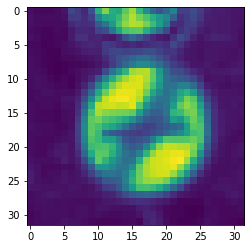

In [35]:
plt.imshow(color.rgb2gray(X_train[0]))

In [37]:
color.rgb2gray(X_train).shape
# odpalamy na wszystkich zdjeciach pamietajac ze mamy jeden kanal

(34799, 32, 32)

In [38]:
#transformacja dla wszystkich zdięć
X_train_gray = color.rgb2gray(X_train).reshape(-1, 32, 32, 1)
X_test_gray = color.rgb2gray(X_test).reshape(-1, 32, 32, 1)

model = get_cnn_v5((32, 32, 1), num_classes)
model_trained = train_model(model, X_train_gray, y_train, params_fit={})
predict(model_trained, X_test_gray, y_test)

Epoch 1/5
272/272 [==============================] - 4s 14ms/step - loss: 2.6392 - accuracy: 0.2589 - val_loss: 0.7388 - val_accuracy: 0.7622
Epoch 2/5
272/272 [==============================] - 4s 13ms/step - loss: 0.5460 - accuracy: 0.8234 - val_loss: 0.1089 - val_accuracy: 0.9670
Epoch 3/5
272/272 [==============================] - 4s 14ms/step - loss: 0.2181 - accuracy: 0.9303 - val_loss: 0.0500 - val_accuracy: 0.9845
Epoch 4/5
272/272 [==============================] - 4s 13ms/step - loss: 0.1493 - accuracy: 0.9520 - val_loss: 0.0324 - val_accuracy: 0.9917
Epoch 5/5
272/272 [==============================] - 4s 14ms/step - loss: 0.1127 - accuracy: 0.9654 - val_loss: 0.0200 - val_accuracy: 0.9938


0.9732426303854875

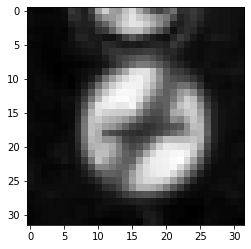

In [36]:
plt.imshow(color.rgb2gray(X_train[0]), cmap=plt.get_cmap('gray'))

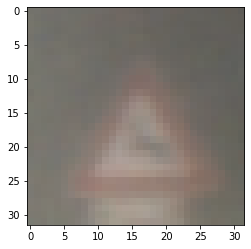

In [39]:
def preproc_img(img):
  hsv = color.rgb2hsv(img)
  hsv[:, :, 2] = exposure.equalize_adapthist(hsv[:, :, 2])
  img = color.hsv2rgb(hsv)

  return img

plt.imshow(X_train[400])

# dostajemy z tej funkcji zdjecie bez zadnej manipulacji

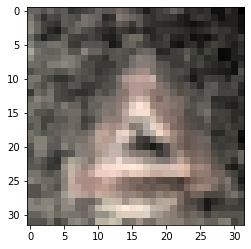

In [40]:
plt.imshow(preproc_img (X_train[400]))

# podkrecamy troche kontrasty

In [0]:
X_train_prp = X_train.copy().astype(np.float32)
X_test_prp = X_test.copy().astype(np.float32)

for i in tdqm(range(X_train.shape[0])):
  X_train_prp[i] = preproc_img(X_train[i])

#ten kawalek kodu jest dosc wolny ale moze pomoc w manipulacji danymi
